In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv(r'D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

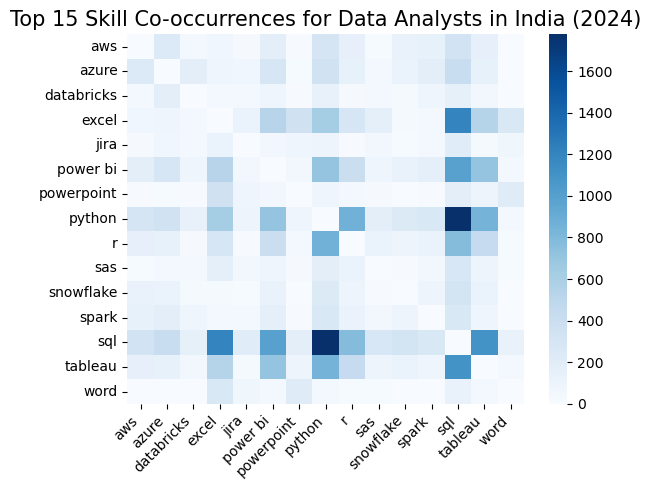

In [ ]:
from collections import Counter
from itertools import combinations

# Filter data
df_2024_IN = df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'India')
].copy()

df_2024_IN.dropna(subset='job_skills', inplace=True)

# Count the occurrence of each skill
skills_count = Counter()

for skills in df_2024_IN['job_skills']:
    skills_count.update(skills)

top_n = 15

# Select the top n skills and convert to a set for .intersection()
top_skills1 = set([s1 for s1, _ in skills_count.most_common(top_n)])

coocurrence1 = Counter()

for skills_2 in df_2024_IN['job_skills']:
    filtered1 = top_skills1.intersection(skills_2)
    paired1 = combinations(sorted(filtered1), 2)
    coocurrence1.update(paired1)

pairs1, cnt = zip(*coocurrence1.items())
df_pairs1 = pd.DataFrame(pairs1, columns=['Skill_1', 'Skill_2'])
df_pairs1['cnt'] = cnt

df_matrix = df_pairs1.pivot_table(
    index='Skill_1',
    columns='Skill_2',
    values='cnt',
    fill_value=0
)

# Make sure skill names align in both rows and columns before transposing
skill_names = sorted(top_skills1)
df_matrix = df_matrix.reindex(index=skill_names, columns=skill_names, fill_value=0)

# Transpose the matrix to convert it into a full matrix
df_matrix = df_matrix + df_matrix.T

sns.heatmap(data=df_matrix, cmap='Blues')
plt.title(f"Top {top_n} Skill Co-occurrences for Data Analysts in India (2024)", fontsize=15)
plt.xlabel('')
plt.xticks(rotation=45, ha="right")
plt.ylabel('')
plt.yticks(rotation=0)

plt.show()